Import necessary package for performing Analysis over the House Price Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('kc_house_data.csv')
data = data.drop("date", axis = 1)

In [3]:
corr = data.corr()

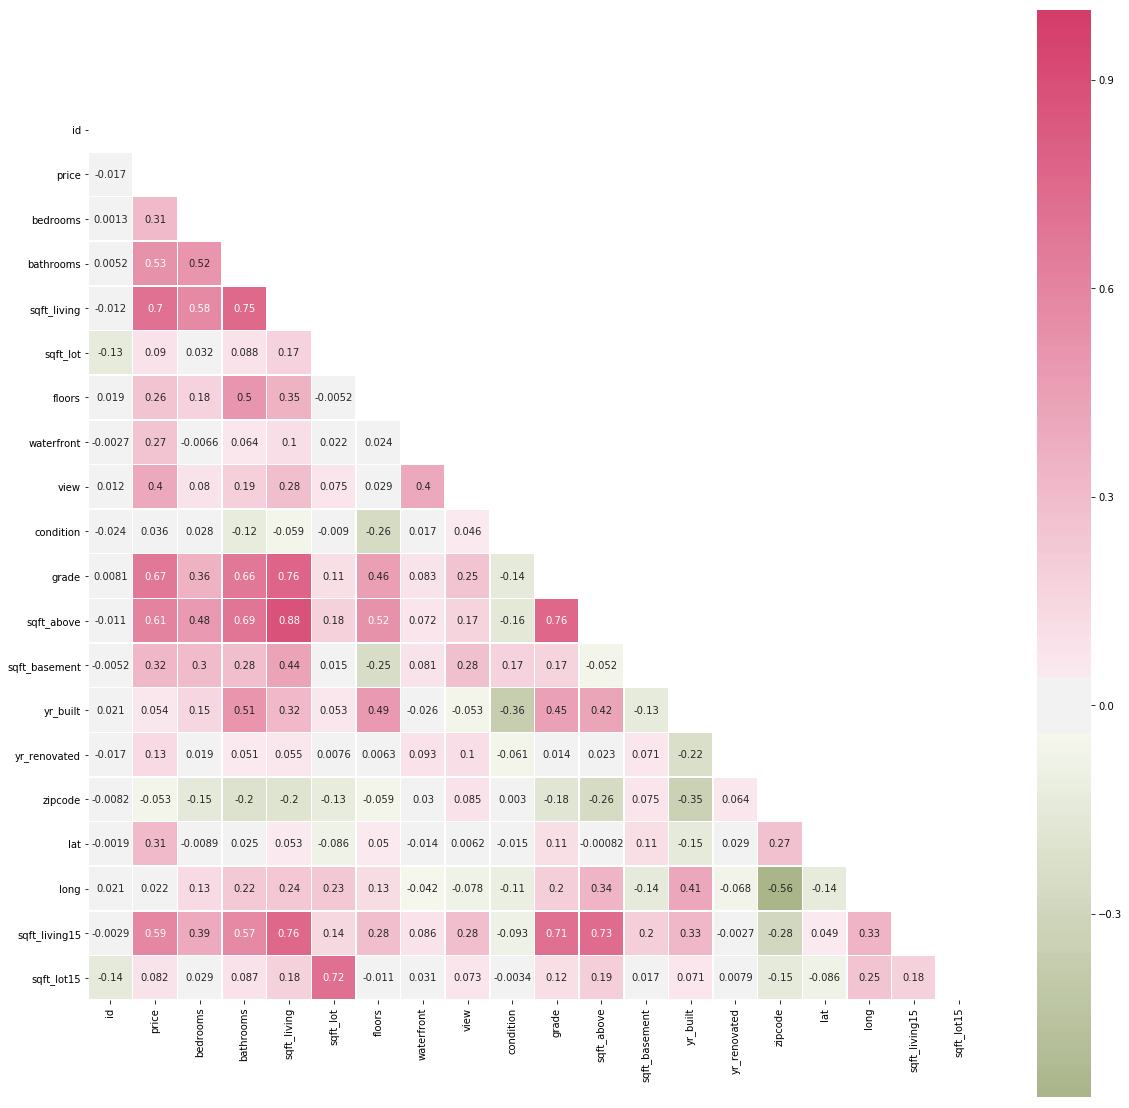

In [4]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(100, 0, as_cmap=True)
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, cmap=cmap, square = True, mask=mask, center= 0, vmax=1, linewidths=.5, annot = True )

Ideally independant variables should be correlated to the dependant variable but not to each other. 

Price(Dependant Variable) is highly correlated with the following independant variables:

1) Bathrooms

2) Sqft_living

3) Grade

4) Sqft_above

5) Sqft_living15

We cannot use the rest of the varibales in the multiple regression

Also we notice that some variables are highly correlated hence we can only keep some and discard redundant. 

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features = ['bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15']
X = data[features]
Y = data['price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

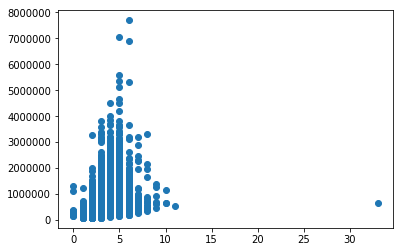

In [6]:
Z = data['bedrooms']
plt.scatter(Z, Y)

In [7]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
Y_pred = regressor.predict(X_test)

In [8]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
df.head()

,Actual,Predicted
735,365000.0,5.555942e+05
2830,865000.0,7.524956e+05
4106,1038000.0,1.174529e+06
16218,1490000.0,1.386687e+06
19964,711000.0,7.305370e+05


Text(0, 0.5, 'Predicted Prices')

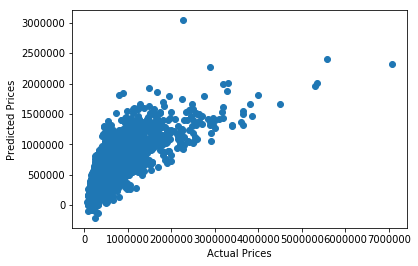

In [9]:
plt.scatter(Y_test, Y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")

In [10]:
# from sklearn.utils.validation import check_array

# def mean_absolute_percentage_error(Y_test, Y_pred):
#     Y_test, Y_pred = check_array(Y_test, Y_pred)
#     return np.mean(np.abs((Y_test - Y_pred) / Y_test)) * 100

# print('Mean Absolute Percentage Error', mean_absolute_percentage_error(Y_test, Y_pred))

In [11]:
from sklearn import metrics 
print('Mean Absolute Error', metrics.mean_absolute_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error 164379.32898327912
Root Mean Squared Error: 263009.7664039069
